In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, interpolate, fft
rng = np.random.default_rng()

In [5]:
#generate randomly sampled points from some input function (e.g., sine)
N_samp = 10
x_sample = rng.uniform(low=0, high=4*np.pi, size=N_samp)
y_sample = np.sin(x_sample)

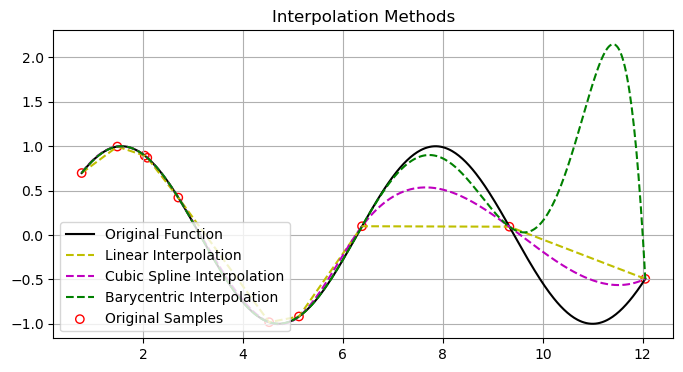

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, BarycentricInterpolator

# Sort the samples for interpolation
sorted_indices = np.argsort(x_sample)
x_sample = x_sample[sorted_indices]
y_sample = y_sample[sorted_indices]

# Define dense x values for interpolation
min_x, max_x = min(x_sample), max(x_sample)
approx_x = np.linspace(min_x, max_x, 500)

#Linear
interp_func_linear = interpolate.interp1d(x_sample, y_sample, kind='linear')
approx_y = interp_func_linear(approx_x)


# Cubic Spline interpolation
interp_func_cubic = CubicSpline(x_sample, y_sample)
approx_y_cubic = interp_func_cubic(approx_x)


# Barycentric interpolation
interp_func_bary = BarycentricInterpolator(x_sample, y_sample)
approx_y_bary = interp_func_bary(approx_x)

plt.figure(figsize=(8, 4))
plt.plot(approx_x, np.sin(approx_x), 'k-', label="Original Function")
plt.plot(approx_x, approx_y, 'y--', label="Linear Interpolation")
plt.plot(approx_x, approx_y_cubic, 'm--', label="Cubic Spline Interpolation")
plt.plot(approx_x, approx_y_bary, 'g--', label="Barycentric Interpolation")
plt.scatter(x_sample, y_sample, facecolors='none', edgecolors='red', label="Original Samples")
plt.title("Interpolation Methods")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

1024


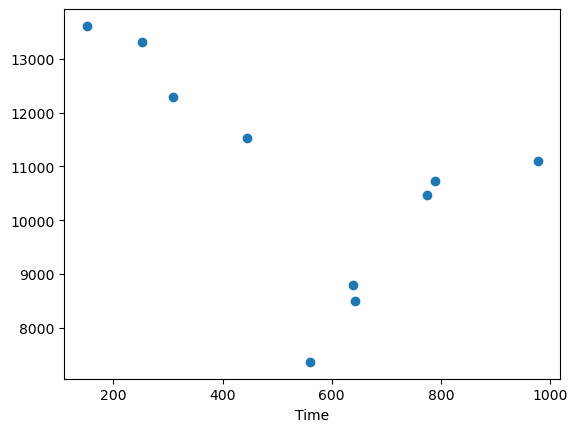

In [7]:
dow_data = np.loadtxt("dow.txt")
print(len(dow_data))
# plt.plot(dow_data, color="red")
plt.xlabel("Time")

num_points = 10
idx_choice = rng.choice(range(len(dow_data)), size = num_points, replace = False)
subsample = dow_data[idx_choice]
plt.scatter(idx_choice, subsample)

In [22]:
#generate randomly sampled points from some input function (e.g., sine)
dow_data = np.loadtxt("dow.txt")

N_samp = 512
x_sample = rng.choice(range(len(dow_data)), size = N_samp, replace = False)
y_sample = dow_data[x_sample]

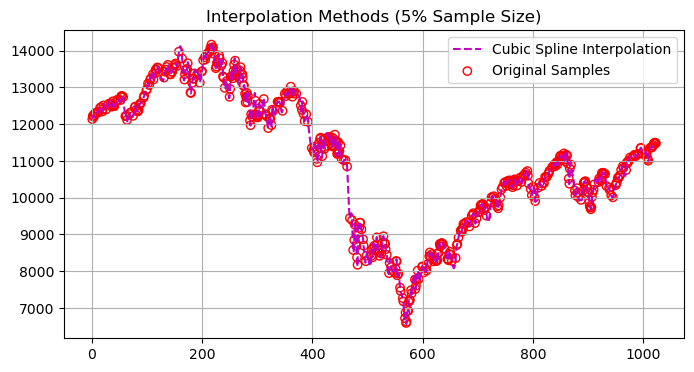

<Figure size 640x480 with 0 Axes>

In [25]:
import numpy as np

# Sort the samples for interpolation
sorted_indices = np.argsort(x_sample)
x_sample = x_sample[sorted_indices]
y_sample = y_sample[sorted_indices]

# Define dense x values for interpolation
min_x, max_x = min(x_sample), max(x_sample)
approx_x = np.linspace(min_x, max_x, 10*N_samp)



# Cubic Spline interpolation
interp_func_cubic = CubicSpline(x_sample, y_sample)
approx_y_cubic = interp_func_cubic(approx_x)

# Barycentric interpolation
# interp_func_bary = BarycentricInterpolator(x_sample, y_sample)
# approx_y_bary = interp_func_bary(approx_x)

plt.figure(figsize=(8, 4))
# plt.plot(approx_x, , 'k-', label="Original Function")
plt.plot(approx_x, approx_y_cubic, 'm--', label="Cubic Spline Interpolation")
# plt.plot(approx_x, approx_y_bary, 'g--', label="Barycentric Interpolation")
plt.scatter(x_sample, y_sample, facecolors='none', edgecolors='red', label="Original Samples")
plt.title("Interpolation Methods (5% Sample Size)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("Interpolation Methods (50% Sample Size).png")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, BarycentricInterpolator

# Load data
dow_data = np.loadtxt("dow.txt")  # Should be 1D array

# Random generator
rng = np.random.default_rng(seed=42)

# Sampling
N_samp = 51
x_sample = rng.choice(range(len(dow_data)), size=N_samp, replace=False)
y_sample = dow_data[x_sample]

# Sort samples
sorted_indices = np.argsort(x_sample)
x_sample = x_sample[sorted_indices]
y_sample = y_sample[sorted_indices]

# Dense x for global interpolators
min_x, max_x = min(x_sample), max(x_sample)
approx_x = np.linspace(min_x, max_x, 10 * N_samp)

# Cubic Spline
interp_func_cubic = CubicSpline(x_sample, y_sample)
approx_y_cubic = interp_func_cubic(approx_x)

# Segment-based Barycentric
segment_size = 11  # Number of sample points per segment
step = segment_size - 1  # Overlap to ensure smooth transitions
approx_x_bary = []
approx_y_bary = []

# Loop over segments in sample space
for i in range(0, len(x_sample) - segment_size + 1, step):
    x_seg = x_sample[i:i + segment_size]
    y_seg = y_sample[i:i + segment_size]

    # Interpolate this segment on a local dense grid
    x_dense_seg = np.linspace(x_seg[0], x_seg[-1], 100)
    bary_interp = BarycentricInterpolator(x_seg, y_seg)
    y_dense_seg = bary_interp(x_dense_seg)

    approx_x_bary.append(x_dense_seg)
    approx_y_bary.append(y_dense_seg)

# Concatenate all segments
approx_x_bary = np.concatenate(approx_x_bary)
approx_y_bary = np.concatenate(approx_y_bary)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(len(dow_data)), dow_data, 'k-', label="Original dow_data")
plt.plot(approx_x, approx_y_linear, 'y--', label="Linear Interpolation")
plt.plot(approx_x, approx_y_cubic, 'm--', label="Cubic Spline Interpolation")
plt.plot(approx_x_bary, approx_y_bary, 'g--', label="Segmented Barycentric Interpolation")
plt.scatter(x_sample, y_sample, facecolors='none', edgecolors='red', label="Sampled Points")
plt.title("Interpolation of dow_data using Different Methods")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
